<a href="https://colab.research.google.com/github/raziesadri/MNIST-DeepLearning/blob/main/MNIST_CONV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST convolutional Model
The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning. In this code we creat a deep learning model with fuctional API model and convolutional layers using keras library.

## Imports

In [1]:
from keras.datasets import mnist
from keras.models import Model
from keras import layers
import keras
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

## Plot Function

In [13]:
#plotting
def plot_history(net_history):
    history = net_history.history
    import matplotlib.pyplot as plt
    losses = history['loss']
    val_losses = history['val_loss']
    accuracies = history['accuracy']
    val_accuracies = history['val_accuracy']
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(['loss', 'val_accuracy'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(['accuracy', 'val_accuracy'])

## Load Data
This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

In [3]:
#load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data attributes
print("train_images dimentions: ", train_images.ndim)
print("train_images shape: ", train_images.shape)
print("train_images type: ", train_images.dtype)

11501568/11490434 [==============================] - 0s 0us/step
train_images dimentions:  3
train_images shape:  (60000, 28, 28)
train_images type:  uint8


## Data Pre Process

In [4]:
#reshap: add channel dimension
x_train = train_images.reshape(60000, 28, 28, 1)
x_test = test_images.reshape(10000, 28, 28, 1)

#change the type from integer to float for normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalization
x_train /= 255
x_test/= 255

#label's one hot encoding 
from keras.utils import np_utils
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Creat Convolutional Layers

In [5]:
myInput = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(16, 3, activation ='relu', padding='same',strides=2)(myInput)
conv2 = layers.Conv2D(32, 3, activation='relu',padding='same', strides=2)(conv1)
flat = layers.Flatten()(conv2) # output form is a vector
out_layer = layers.Dense(10, activation='softmax')(flat)

## Creat Model

In [6]:
myModel = Model(myInput, out_layer)

## Model Summary

In [20]:
myModel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


## Compile Model

In [21]:
myModel.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

## Train Model

In [10]:
network_history = myModel.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)


Epoch 1/20
375/375 [==============================] - 8s 18ms/step - loss: 0.4895 - accuracy: 0.8645 - val_loss: 0.2149 - val_accuracy: 0.9396
Epoch 2/20
375/375 [==============================] - 7s 18ms/step - loss: 0.1722 - accuracy: 0.9490 - val_loss: 0.1277 - val_accuracy: 0.9612
Epoch 3/20
375/375 [==============================] - 7s 18ms/step - loss: 0.1071 - accuracy: 0.9683 - val_loss: 0.0925 - val_accuracy: 0.9729
Epoch 4/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0823 - accuracy: 0.9753 - val_loss: 0.0864 - val_accuracy: 0.9734
Epoch 5/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0689 - accuracy: 0.9795 - val_loss: 0.0741 - val_accuracy: 0.9793
Epoch 6/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.0716 - val_accuracy: 0.9798
Epoch 7/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0523 - accuracy: 0.9838 - val_loss: 0.0729 - val_accuracy: 0.9799

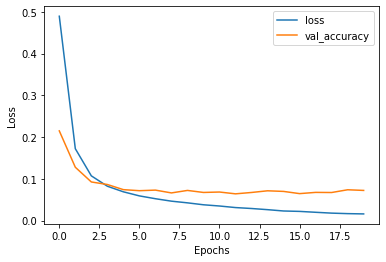

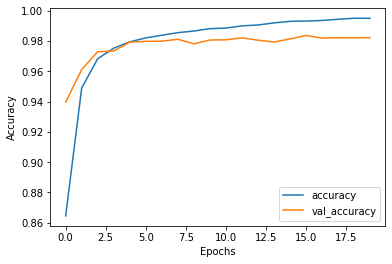

In [14]:
plot_history(network_history)

## Test Model

### Evaluation

In [15]:
test_loss, test_acc = myModel.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9836


### Predict

In [16]:
test_labels_p = myModel.predict(x_test)
test_labels_p = np.argmax(test_labels_p, axis=1)
print(test_labels_p)

[7 2 1 ... 4 5 6]


In [17]:
y_test = np.argmax(y_test, axis=1)
print(y_test)

[7 2 1 ... 4 5 6]


### Confusion Matrix

In [18]:
confusion_matrix(y_true=y_test, y_pred=test_labels_p)

array([[ 975,    0,    0,    0,    1,    1,    1,    0,    1,    1],
       [   0, 1130,    2,    1,    0,    0,    1,    0,    1,    0],
       [   3,    5, 1011,    2,    2,    0,    1,    6,    2,    0],
       [   0,    0,    2,  995,    0,    7,    0,    2,    1,    3],
       [   0,    1,    0,    0,  977,    0,    0,    0,    0,    4],
       [   3,    0,    0,    5,    0,  876,    5,    2,    0,    1],
       [   3,    2,    1,    0,    1,    3,  946,    0,    2,    0],
       [   0,    3,    8,    4,    0,    0,    0, 1005,    2,    6],
       [   5,    1,    3,    6,    0,    2,    1,    4,  946,    6],
       [   1,    3,    1,    0,   15,    5,    0,    6,    3,  975]])

### Classification Report

In [19]:
print(classification_report(y_test, test_labels_p))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

